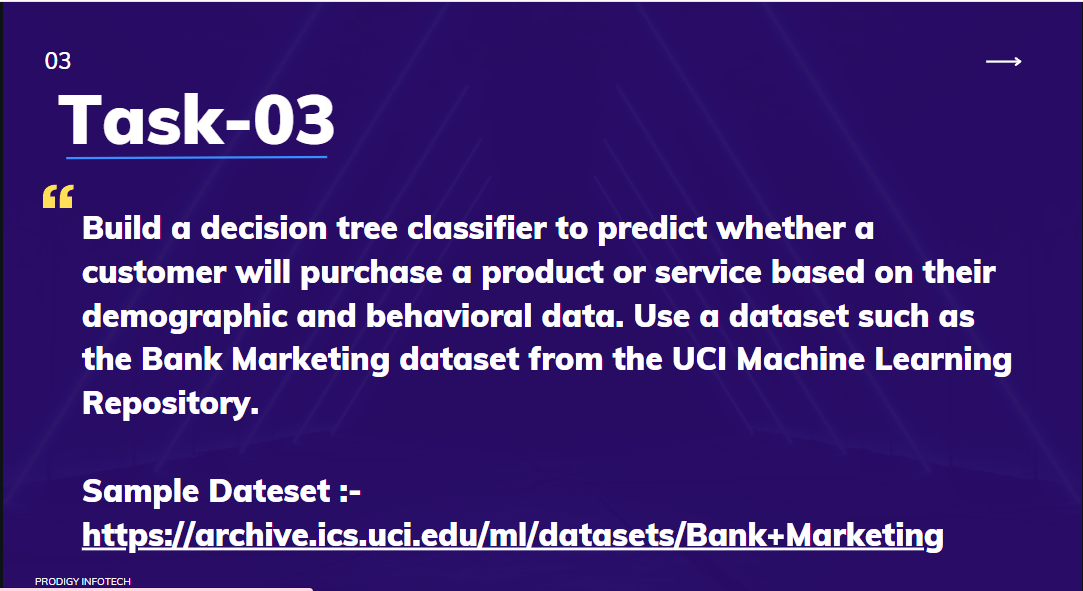

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection  import train_test_split
from scipy.stats import chi2_contingency
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")


In [4]:
da =pd.read_csv("/content/bank-full.csv",sep=";")

Input variables:
   # bank client data:

   1 - age (numeric)

   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")

   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

   4 - education (categorical: "unknown","secondary","primary","tertiary")

   5 - default: has credit in default? (binary: "yes","no")

   6 - balance: average yearly balance, in euros (numeric)

   7 - housing: has housing loan? (binary: "yes","no")

   8 - loan: has personal loan? (binary: "yes","no")

   # related with the last contact of the current campaign:

   9 - contact: contact communication type (categorical:
   "unknown","telephone","cellular")

  10 - day: last contact day of the month (numeric)

  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

  12 - duration: last contact duration, in seconds (numeric)

   # other attributes:

  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

  15 - previous: number of contacts performed before this campaign and for this client (numeric)

  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")


  Output variable (desired target):
  
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")



In [5]:
da.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
da.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [7]:
da.tail()

age           job   marital  education default  balance housing loan  \
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no

In [8]:
da.shape

(45211, 17)

In [9]:
da.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [11]:
da.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [12]:
da["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [13]:
yes=da.loc[da["y"]=="yes","y"].count()/len(da)*100
no = da.loc[da["y"]=="no","y"].count()/len(da)*100
print("Percentage of yes:", yes)
print("Percentage of no:", no)

Percentage of yes: 11.698480458295547
Percentage of no: 88.30151954170445


In [14]:
df=da.copy()

In [15]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [16]:
df.shape

(45211, 17)

In [17]:
df["target"]=df["y"].map({"yes":1,"no":0})

In [18]:
df["target"].value_counts()

0    39922
1     5289
Name: target, dtype: int64

In [19]:
px.pie(df,"target")

<Axes: xlabel='age', ylabel='Count'>

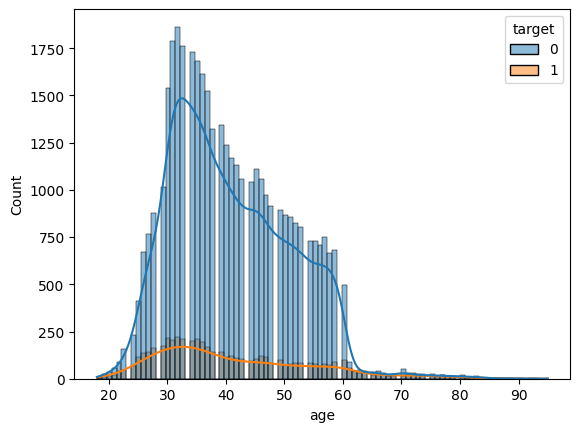

In [20]:
sns.histplot(data=df,x="age",kde=True,hue="target")

In [21]:
px.histogram(df,x="age",color="target")

<Axes: xlabel='target', ylabel='age'>

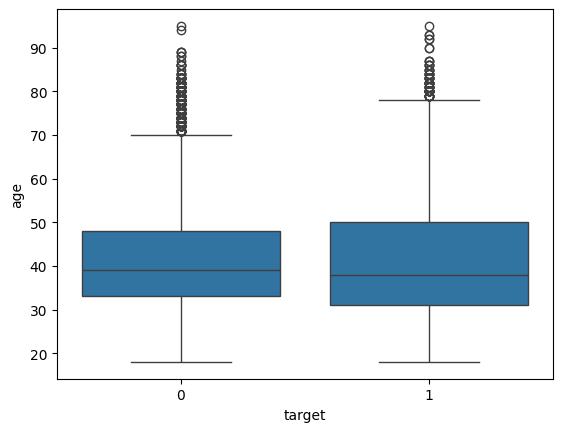

In [22]:
sns.boxplot(data=df,y="age",x="target")

In [23]:
df["job"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [24]:
df["job"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [25]:
df.groupby("job")["target"].agg(sum)

job
admin.            631
blue-collar       708
entrepreneur      123
housemaid         109
management       1301
retired           516
self-employed     187
services          369
student           269
technician        840
unemployed        202
unknown            34
Name: target, dtype: int64

In [26]:
px.histogram(df,x="job",color="target",title='count of Jobs by Target',)

In [27]:
df["marital"].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [28]:
px.histogram(df,x="marital",color="target")

In [29]:
df.groupby("marital")["target"].agg(sum)

marital
divorced     622
married     2755
single      1912
Name: target, dtype: int64

In [30]:
df["education"].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [31]:
df["education"].replace("unknown",df["education"].mode()[0],inplace=True)

In [32]:
df["education"].value_counts()

secondary    25059
tertiary     13301
primary       6851
Name: education, dtype: int64

In [33]:
px.histogram(df,x="education",color="education",facet_col="target")

In [34]:
df.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [35]:
df.groupby("default")["target"].agg(sum)

default
no     5237
yes      52
Name: target, dtype: int64

In [141]:
num=df.loc[:,['age','balance', 'day', 'duration', 'campaign','loan', 'pdays','previous','target']]

In [37]:
?sns.pairplot

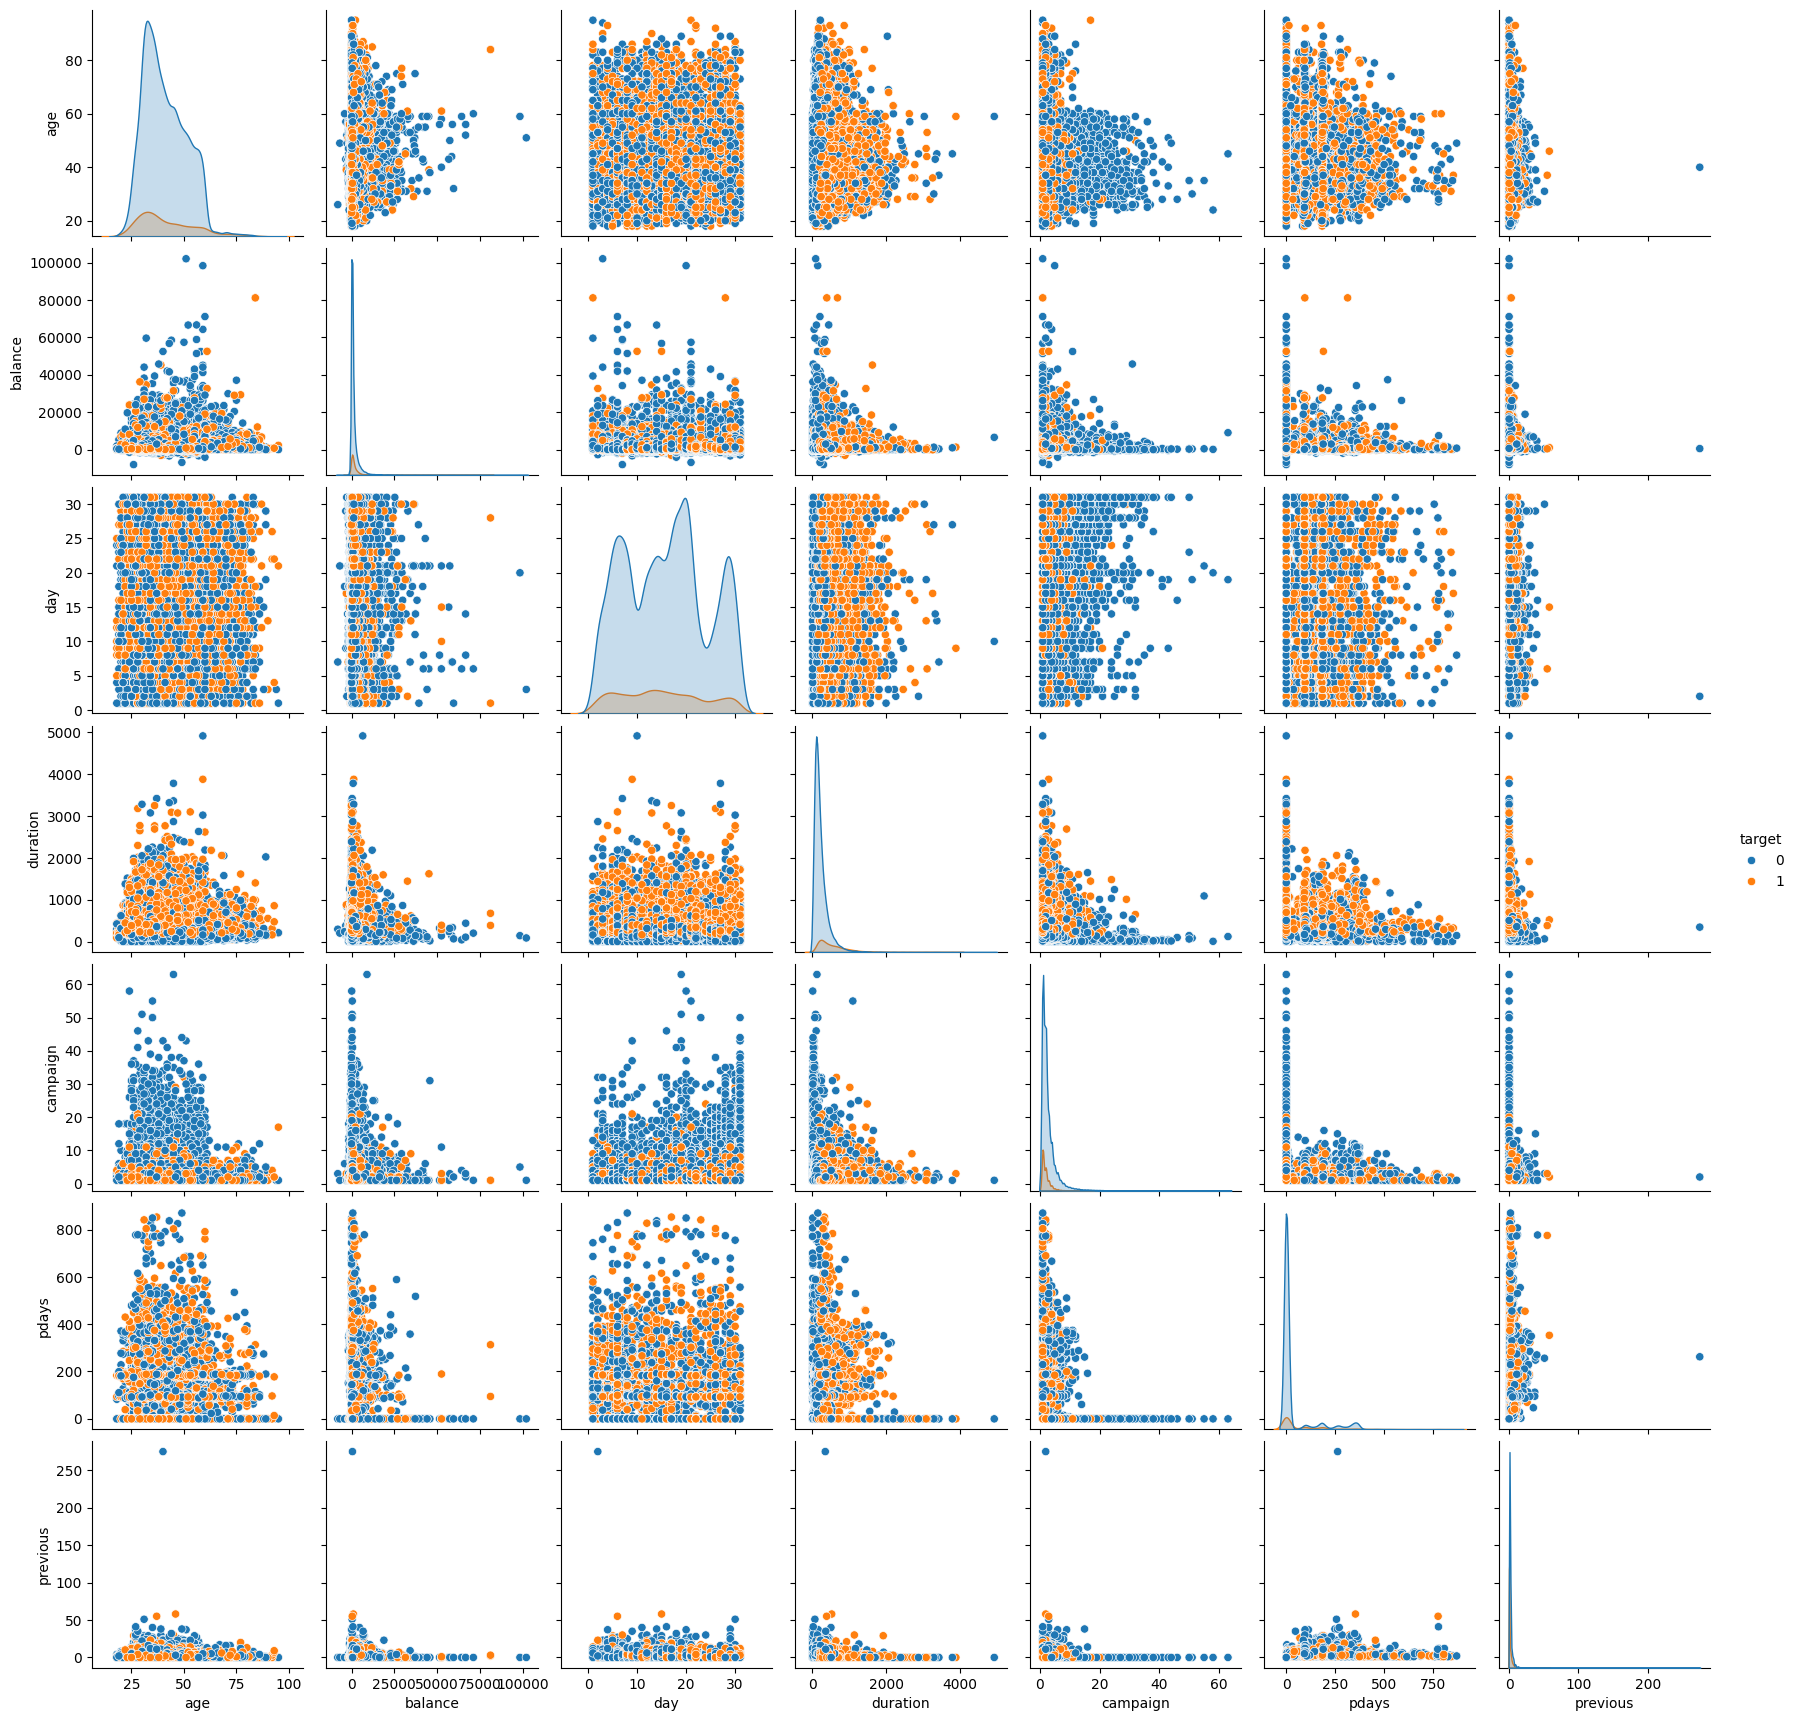

In [142]:
sns.pairplot(num,hue="target")

<Axes: >

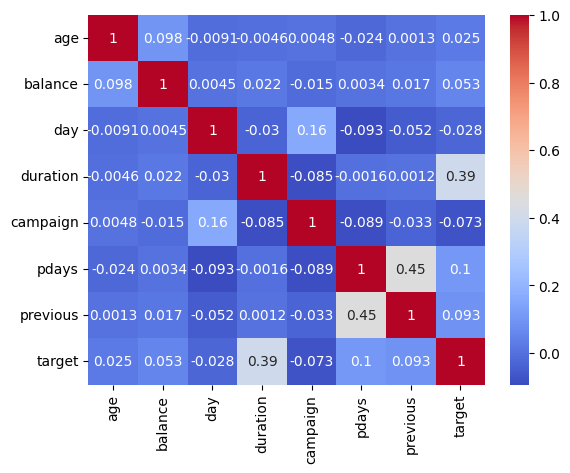

In [40]:
cm=num.corr()
sns.heatmap(cm,annot=True,cmap="coolwarm")

In [135]:
px.histogram(df,x="duration",color="target")

<Axes: xlabel='loan', ylabel='count'>

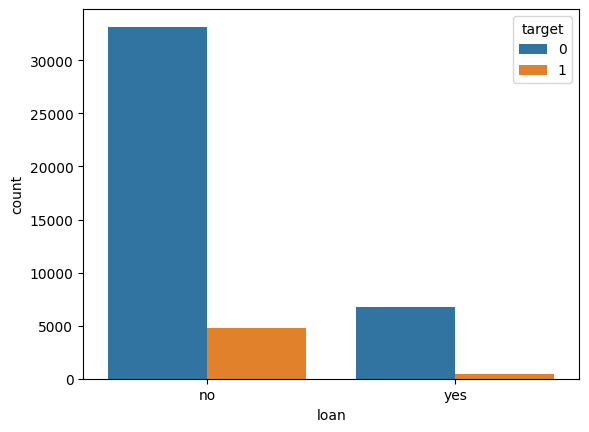

In [139]:
sns.countplot(data=df,x="loan",hue="target")

**Based on these correlations, variables such as duration, pdays, and previous seem to have relatively stronger correlations with the target variable compared to others.**

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
 17  target     45211 non-null  int64 
dtypes: int64(8), object(10)
memory usage: 6.2+ MB


In [42]:
cat=df.loc[:,['job', 'marital', 'education', 'default', 'housing','loan', 'contact', 'month','poutcome', 'y']]
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        45211 non-null  object
 1   marital    45211 non-null  object
 2   education  45211 non-null  object
 3   default    45211 non-null  object
 4   housing    45211 non-null  object
 5   loan       45211 non-null  object
 6   contact    45211 non-null  object
 7   month      45211 non-null  object
 8   poutcome   45211 non-null  object
 9   y          45211 non-null  object
dtypes: object(10)
memory usage: 3.4+ MB


In [43]:



categorical_columns = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]
target_variable = "y"


association_results = pd.DataFrame(columns=["Column", "Chi-square", "P-value"])


for column in categorical_columns:
    contingency_table = pd.crosstab(df[column], df[target_variable])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    association_results = association_results.append({"Column": column, "Chi-square": chi2, "P-value": p}, ignore_index=True)


print(association_results)


      Column   Chi-square        P-value
0        job   836.105488  3.337122e-172
1    marital   196.495946   2.145100e-43
2  education   223.834823   2.482480e-49
3    default    22.202250   2.453861e-06
4    housing   874.822449  2.918798e-192
5       loan   209.616980   1.665061e-47
6    contact  1035.714225  1.251738e-225
7      month  3061.838938   0.000000e+00
8   poutcome  4391.506589   0.000000e+00


In [101]:
x=df[['job', 'marital', 'education', 'default', 'housing','loan', 'contact', 'month','poutcome', 'duration', 'pdays','previous','campaign','balance']]

In [102]:
dq=df.copy()

In [103]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        45211 non-null  object
 1   marital    45211 non-null  object
 2   education  45211 non-null  object
 3   default    45211 non-null  object
 4   housing    45211 non-null  object
 5   loan       45211 non-null  object
 6   contact    45211 non-null  object
 7   month      45211 non-null  object
 8   poutcome   45211 non-null  object
 9   duration   45211 non-null  int64 
 10  pdays      45211 non-null  int64 
 11  previous   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  balance    45211 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


In [104]:
y=df["target"]
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 45211 entries, 0 to 45210
Series name: target
Non-Null Count  Dtype
--------------  -----
45211 non-null  int64
dtypes: int64(1)
memory usage: 353.3 KB


In [105]:
x

job   marital  education default housing loan    contact  \
0        management   married   tertiary      no     yes   no    unknown   
1        technician    single  secondary      no     yes   no    unknown   
2      entrepreneur   married  secondary      no     yes  yes    unknown   
3       blue-collar   married  secondary      no     yes   no    unknown   
4           unknown    single  secondary      no      no   no    unknown   
...             ...       ...        ...     ...     ...  ...        ...   
45206    technician   married   tertiary      no      no   no   cellular   
45207       retired  divorced    primary      no      no   no   cellular   
45208       retired   married  secondary      no      no   no   cellular   
45209   blue-collar   married  secondary      no      no   no  telephone   
45210  entrepreneur   married  secondary      no      no   no   cellular   

      month poutcome  duration  pdays  previous  campaign  balance  
0       may  unknown       261     -1         0         1     2143  
1       may  unknown       151     -1         0         1       29  
2       may  unknown        76     -1         0         1        2  
3       may  unknown        92     -1         0         1     1506  
4       may  unknown       198     -1         0         1        1  
...     ...      ...       ...    ...       ...       ...      ...  
45206   nov  unknown       977     -1         0         3      825  
45207   nov  unknown       456     -1         0         2     1729  
45208   nov  success      1127    184         3         5     5715  
45209   nov  unknown       508     -1         0         4      668  
45210   nov    other       361    188        11         2     2971  

[45211 rows x 14 columns]

In [106]:
x_org=x.copy()

In [107]:
x_org

job   marital  education default housing loan    contact  \
0        management   married   tertiary      no     yes   no    unknown   
1        technician    single  secondary      no     yes   no    unknown   
2      entrepreneur   married  secondary      no     yes  yes    unknown   
3       blue-collar   married  secondary      no     yes   no    unknown   
4           unknown    single  secondary      no      no   no    unknown   
...             ...       ...        ...     ...     ...  ...        ...   
45206    technician   married   tertiary      no      no   no   cellular   
45207       retired  divorced    primary      no      no   no   cellular   
45208       retired   married  secondary      no      no   no   cellular   
45209   blue-collar   married  secondary      no      no   no  telephone   
45210  entrepreneur   married  secondary      no      no   no   cellular   

      month poutcome  duration  pdays  previous  campaign  balance  
0       may  unknown       261     -1         0         1     2143  
1       may  unknown       151     -1         0         1       29  
2       may  unknown        76     -1         0         1        2  
3       may  unknown        92     -1         0         1     1506  
4       may  unknown       198     -1         0         1        1  
...     ...      ...       ...    ...       ...       ...      ...  
45206   nov  unknown       977     -1         0         3      825  
45207   nov  unknown       456     -1         0         2     1729  
45208   nov  success      1127    184         3         5     5715  
45209   nov  unknown       508     -1         0         4      668  
45210   nov    other       361    188        11         2     2971  

[45211 rows x 14 columns]

In [108]:
x1=pd.get_dummies(x_org)
x1

duration  pdays  previous  campaign  balance  job_admin.  \
0           261     -1         0         1     2143           0   
1           151     -1         0         1       29           0   
2            76     -1         0         1        2           0   
3            92     -1         0         1     1506           0   
4           198     -1         0         1        1           0   
...         ...    ...       ...       ...      ...         ...   
45206       977     -1         0         3      825           0   
45207       456     -1         0         2     1729           0   
45208      1127    184         3         5     5715           0   
45209       508     -1         0         4      668           0   
45210       361    188        11         2     2971           0   

       job_blue-collar  job_entrepreneur  job_housemaid  job_management  ...  \
0                    0                 0              0               1  ...   
1                    0                 0              0               0  ...   
2                    0                 1              0               0  ...   
3                    1                 0              0               0  ...   
4                    0                 0              0               0  ...   
...                ...               ...            ...             ...  ...   
45206                0                 0              0               0  ...   
45207                0                 0              0               0  ...   
45208                0                 0              0               0  ...   
45209                1                 0              0               0  ...   
45210                0                 1              0               0  ...   

       month_jun  month_mar  month_may  month_nov  month_oct  month_sep  \
0              0          0          1          0          0          0   
1              0          0          1          0          0          0   
2              0          0          1          0          0          0   
3              0          0          1          0          0          0   
4              0          0          1          0          0          0   
...          ...        ...        ...        ...        ...        ...   
45206          0          0          0          1          0          0   
45207          0          0          0          1          0          0   
45208          0          0          0          1          0          0   
45209          0          0          0          1          0          0   
45210          0          0          0          1          0          0   

       poutcome_failure  poutcome_other  poutcome_success  poutcome_unknown  
0                     0               0                 0                 1  
1                     0               0                 0                 1  
2                     0               0                 0                 1  
3                     0               0                 0                 1  
4                     0               0                 0                 1  
...                 ...             ...               ...               ...  
45206                 0               0                 0                 1  
45207                 0               0                 0                 1  
45208                 0               0                 1                 0  
45209                 0               0                 0                 1  
45210                 0               1                 0                 0  

[45211 rows x 48 columns]

In [109]:
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size=0.2,random_state=42)

In [110]:
x_train.shape,y_train.shape

((36168, 48), (36168,))

In [111]:
x_test.shape,y_test.shape

((9043, 48), (9043,))

In [112]:



dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_train_pred = dt.predict(x_train)

train_acc=accuracy_score(y_train,y_train_pred)
train_cc_report=classification_report(y_train,y_train_pred)

y_test_pred = dt.predict(x_test)
test_acc = accuracy_score(y_test,y_test_pred)
report_test = classification_report(y_test,y_test_pred)
print("test_acc:",test_acc)
print("train_acc:",train_acc)
print("train_cc_report",train_cc_report)
print("test_report:",report_test)

cm=confusion_matrix(y_test,y_test_pred)
cm

test_acc: 0.8692911644365808
train_acc: 1.0
train_cc_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00     31970
           1       1.00      1.00      1.00      4198

    accuracy                           1.00     36168
   macro avg       1.00      1.00      1.00     36168
weighted avg       1.00      1.00      1.00     36168

test_report:               precision    recall  f1-score   support

           0       0.92      0.93      0.93      7952
           1       0.46      0.44      0.45      1091

    accuracy                           0.87      9043
   macro avg       0.69      0.68      0.69      9043
weighted avg       0.87      0.87      0.87      9043



array([[7383,  569],
       [ 613,  478]])

**Interpretation of Reports**:

---




Training Evaluation:

Training Accuracy:
The model achieves perfect accuracy (1.0) on the training data, indicating that it perfectly predicts the labels of the training instances.

Training Classification Report:

For class 0, precision, recall, and F1-score are all perfect (1.00), indicating that the model correctly predicts all instances of class 0.

For class 1, precision, recall, and F1-score are also perfect (1.00), indicating that the model correctly predicts all instances of class 1.

Testing Evaluation:


Testing Accuracy:

 The model achieves an accuracy of approximately 87% on the testing data, indicating that it performs well but not as perfectly as on the training data.

Testing Classification Report:

For class 0, precision is 92%, recall is 93%, and F1-score is 93%. This indicates that the model correctly predicts most instances of class 0, but there is still room for improvement.

For class 1, precision is 46%, recall is 44%, and F1-score is 45%.
This indicates that the model struggles more with predicting instances of class 1, with lower precision, recall, and F1-score values.



Confusion Matrix:

For class 0 (the first row), there are 7383 true negatives (correctly predicted as class 0) and 569 false positives (incorrectly predicted as class 1).


For class 1 (the second row), there are 613 false negatives (incorrectly predicted as class 0) and 478 true positives (correctly predicted as class 1).

<Axes: >

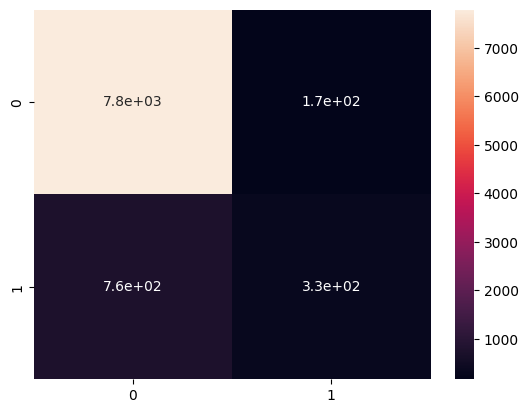

In [125]:
sns.heatmap(cm,annot=True)

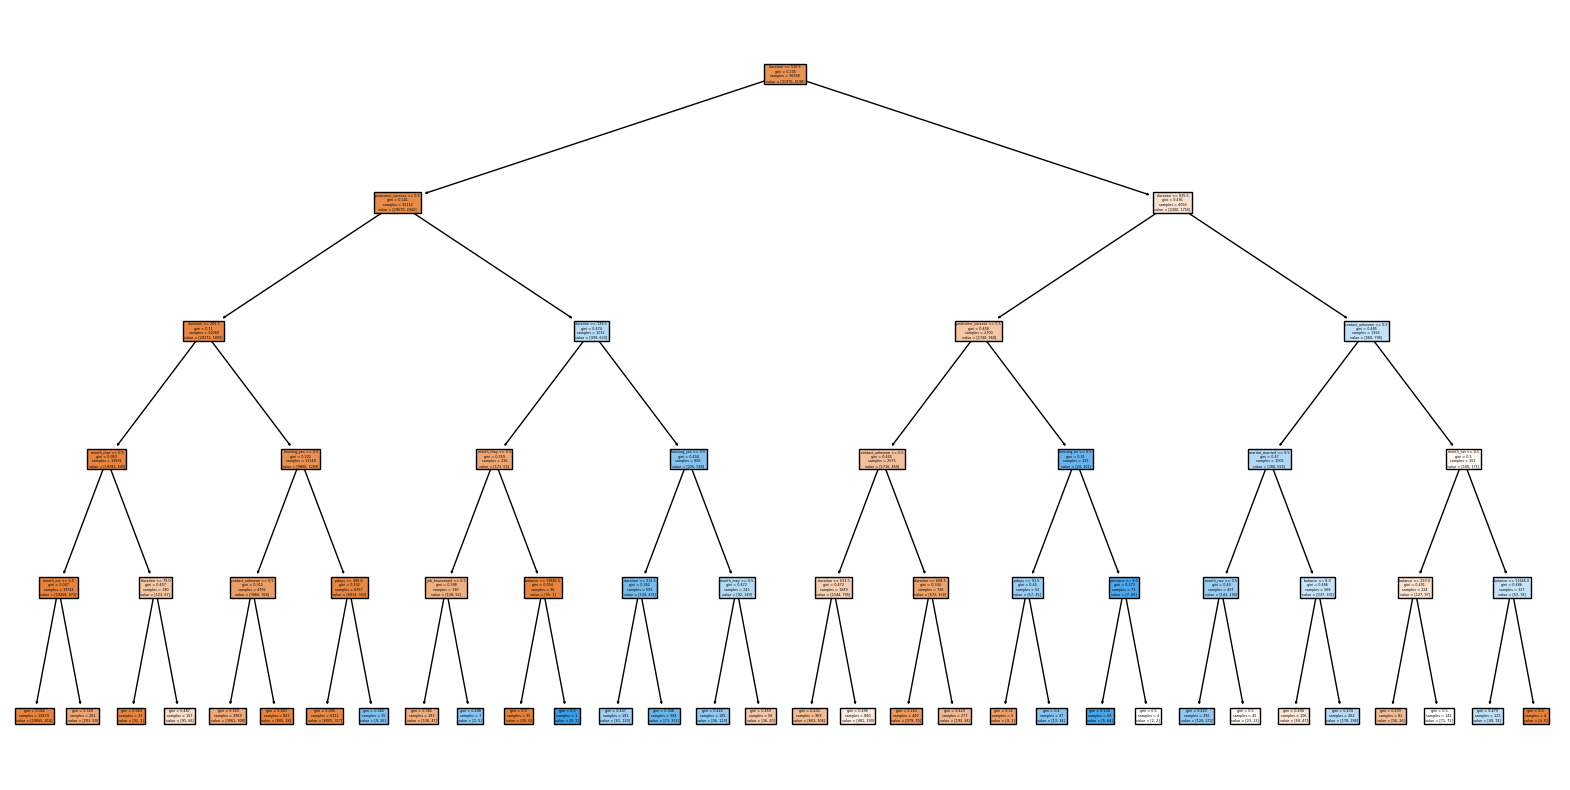

In [123]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=x_train.columns)
plt.show()